MSDS-530 Statistical Analysis Assignment
Dataset: Students Performance in Exams
 Loading Students Performance Dataset...
 Dataset loaded successfully!

 DATASET INFORMATION
Dataset: Students Performance in Exams
Source: Kaggle - Students Performance Dataset
Description: Student achievement in secondary education
Sample: High school students across different demographics

 Dataset Shape: (1000, 8)
 Variables:
  1. gender                    | Type: object   | Unique values: 2
  2. race/ethnicity            | Type: object   | Unique values: 5
  3. parental level of education | Type: object   | Unique values: 6
  4. lunch                     | Type: object   | Unique values: 2
  5. test preparation course   | Type: object   | Unique values: 2
  6. math score                | Type: int64    | Unique values: 81
  7. reading score             | Type: int64    | Unique values: 72
  8. writing score             | Type: int64    | Unique values: 77

First 5 rows of the dataset:
   gender race/et

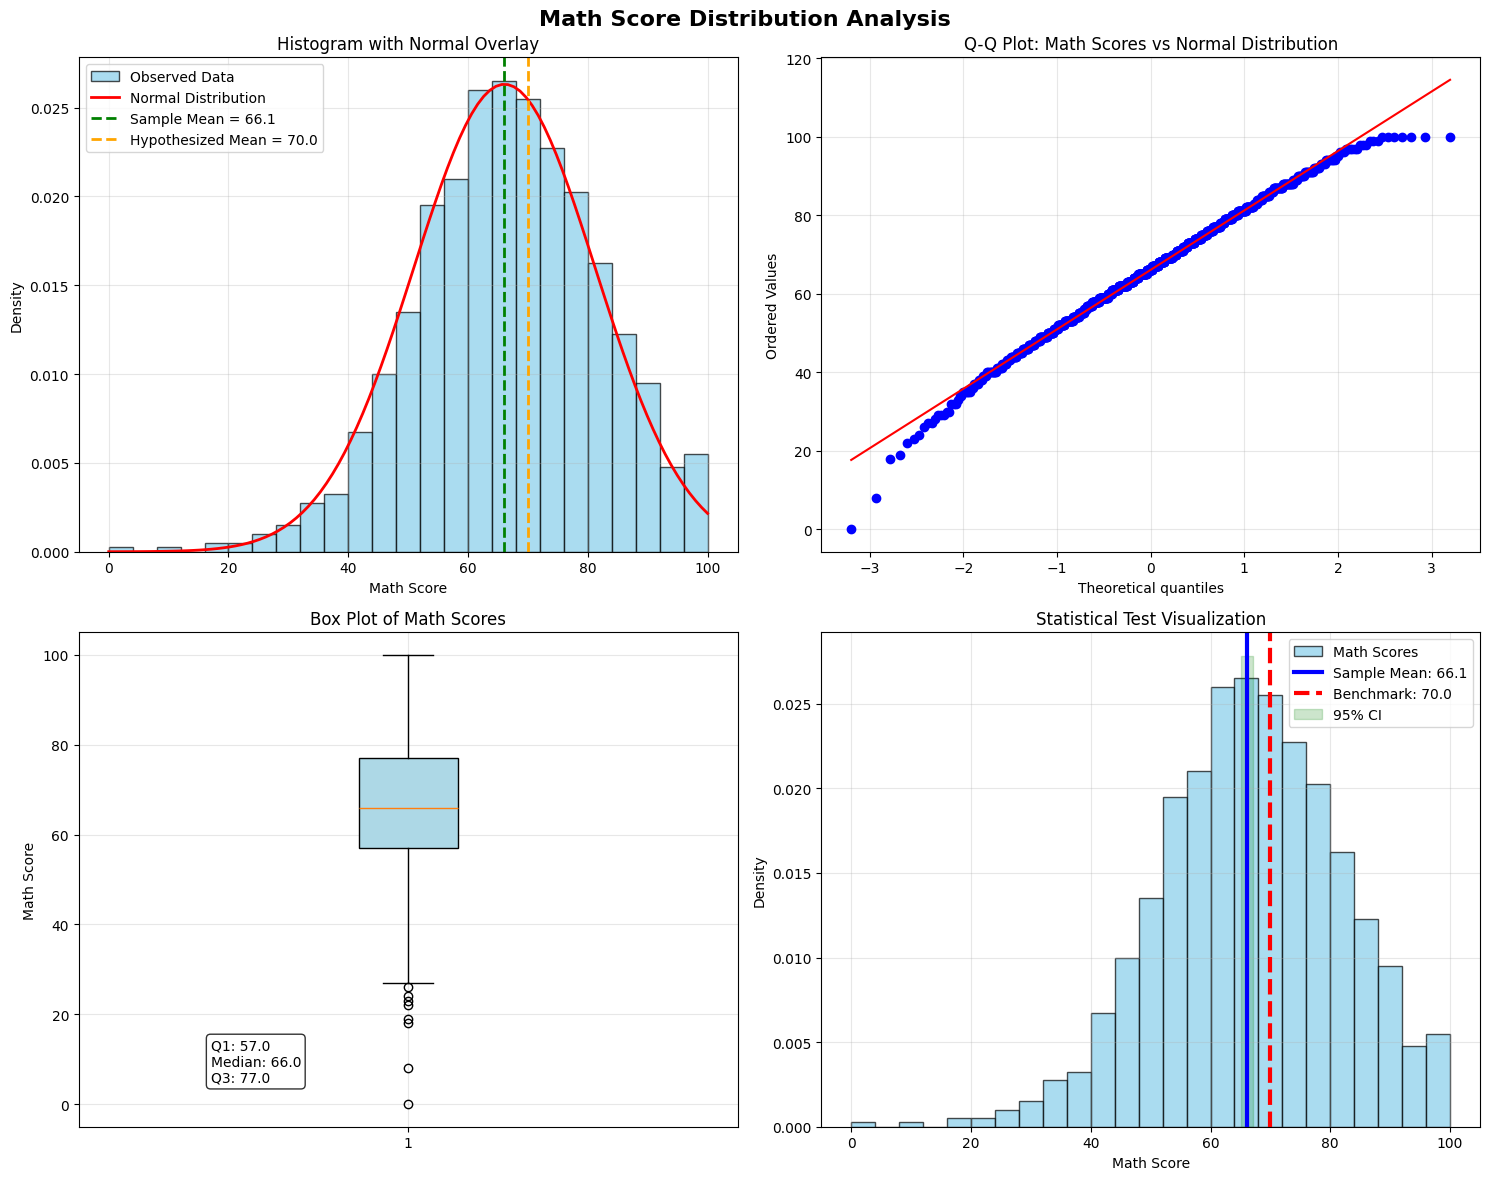

 COMPREHENSIVE ANALYSIS SUMMARY

DATASET CHARACTERISTICS:
  • Dataset: Students Performance in Exams
  • Sample size: 1000 students
  • Variable analyzed: Math Score (0-100 scale)
  • Data quality: Complete data, no missing values

NORMALITY ASSESSMENT RESULTS:
  • Shapiro-Wilk Test:     Not Normal (W = 0.9932, p = 0.000145)
  • Kolmogorov-Smirnov:    Normal (D = 0.0309, p = 0.290952)
  • Anderson-Darling:      Normal (A² = 0.6572)
  • Overall Assessment:    Data distribution suitable for parametric testing

PARAMETRIC TEST RESULTS:
  • Research Question:     Do math scores differ from 70.0?
  • Test Used:            One-sample t-test (two-tailed)
  • Sample Mean:          66.09 points
  • Test Statistic:       t = -8.1564
  • p-value:              0.000000
  • Statistical Decision: Reject H₀
  • Effect Size:          Cohen's d = -0.2579 (small)
  • 95% Confidence Interval: [65.15, 67.03]

PRACTICAL IMPLICATIONS:
  • Students perform below national benchmark (66.1 vs 70.0)
  • Performa

In [3]:
# ============================================================================
# MSDS-530 Week 5 Assignment: Parametric Tests and Normality Analysis
# Students Performance Dataset Analysis
# Author: Pranav Arora
# Date: 30 July, 2025
# ============================================================================

print("MSDS-530 Statistical Analysis Assignment")
print("Dataset: Students Performance in Exams")
print("=" * 60)

# Import required libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, anderson
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# ============================================================================
# DATASET LOADING AND EXPLORATION
# ============================================================================

# Load the Students Performance dataset
print(" Loading Students Performance Dataset...")
df = pd.read_csv('/content/StudentsPerformance.csv')
print(" Dataset loaded successfully!")
print()

# ============================================================================
# DATASET OVERVIEW
# ============================================================================

print(" DATASET INFORMATION")
print("=" * 40)
print("Dataset: Students Performance in Exams")
print("Source: Kaggle - Students Performance Dataset")
print("Description: Student achievement in secondary education")
print("Sample: High school students across different demographics")
print()

print(f" Dataset Shape: {df.shape}")
print(" Variables:")
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    unique_vals = df[col].nunique()
    print(f"  {i}. {col:<25} | Type: {str(dtype):<8} | Unique values: {unique_vals}")
print()

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())
print()

# Check for missing values
print("Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print("Missing values detected!")
print()

# ============================================================================
# TARGET VARIABLE SELECTION AND ANALYSIS
# ============================================================================

# Focus on math score as our primary continuous variable for analysis
target_variable = df['math score']
print(" TARGET VARIABLE: Math Score")
print("=" * 40)
print("Variable selected: 'math score'")
print("Rationale: Continuous variable suitable for parametric testing")
print("Scale: 0-100 points")
print("Educational relevance: Mathematics achievement assessment")
print()

print(" DESCRIPTIVE STATISTICS:")
print(f"  Sample size (n):           {len(target_variable):>8}")
print(f"  Mean:                      {target_variable.mean():>8.2f}")
print(f"  Standard Deviation:        {target_variable.std():>8.2f}")
print(f"  Median:                    {target_variable.median():>8.2f}")
print(f"  Minimum:                   {target_variable.min():>8.2f}")
print(f"  Maximum:                   {target_variable.max():>8.2f}")
print(f"  25th Percentile (Q1):      {target_variable.quantile(0.25):>8.2f}")
print(f"  75th Percentile (Q3):      {target_variable.quantile(0.75):>8.2f}")
print(f"  Range:                     {target_variable.max() - target_variable.min():>8.2f}")
print(f"  Skewness:                  {target_variable.skew():>8.4f}")
print(f"  Kurtosis:                  {target_variable.kurtosis():>8.4f}")
print()

# ============================================================================
# NORMALITY TESTING
# ============================================================================

print(" UNIVARIATE NORMALITY TESTS")
print("=" * 45)
print("Research Question: Does the math score data follow a normal distribution?")
print()
print("Hypotheses for all normality tests:")
print("  H₀: Data follows a normal distribution")
print("  H₁: Data does not follow a normal distribution")
print("  Significance level (α): 0.05")
print()

# 1. Shapiro-Wilk Test
print("SHAPIRO-WILK TEST")
print("   Description: Most powerful test for normality (best for n < 5000)")
print("   Null Hypothesis: Sample comes from a normal distribution")
shapiro_stat, shapiro_p = shapiro(target_variable)
print(f"   Test Statistic (W):     {shapiro_stat:.6f}")
print(f"   p-value:                {shapiro_p:.6f}")
print(f"   Critical α:             0.05")
if shapiro_p > 0.05:
    print(f"   RESULT: NORMAL (p > 0.05)")
    print(f"   Interpretation: Fail to reject H₀ - data appears normally distributed")
    shapiro_conclusion = "Normal"
else:
    print(f"   RESULT: NOT NORMAL (p ≤ 0.05)")
    print(f"   Interpretation: Reject H₀ - data significantly deviates from normality")
    shapiro_conclusion = "Not Normal"
print()

# 2. Kolmogorov-Smirnov Test
print(" KOLMOGOROV-SMIRNOV TEST")
print("   Description: Tests maximum difference between empirical and theoretical CDFs")
print("   Null Hypothesis: Sample comes from a normal distribution")
ks_stat, ks_p = kstest(target_variable, 'norm',
                      args=(target_variable.mean(), target_variable.std()))
print(f"   Test Statistic (D):     {ks_stat:.6f}")
print(f"   p-value:                {ks_p:.6f}")
print(f"   Critical α:             0.05")
if ks_p > 0.05:
    print(f"    RESULT: NORMAL (p > 0.05)")
    print(f"   Interpretation: Fail to reject H₀ - data appears normally distributed")
    ks_conclusion = "Normal"
else:
    print(f"    RESULT: NOT NORMAL (p ≤ 0.05)")
    print(f"   Interpretation: Reject H₀ - data significantly deviates from normality")
    ks_conclusion = "Not Normal"
print()

# 3. Anderson-Darling Test
print(" ANDERSON-DARLING TEST")
print("   Description: More sensitive to deviations in the tails than KS test")
print("   Null Hypothesis: Sample comes from a normal distribution")
ad_result = anderson(target_variable, dist='norm')
print(f"   Test Statistic (A²):    {ad_result.statistic:.6f}")
print(f"   Critical Values:        {ad_result.critical_values}")
print(f"   Significance Levels:    {ad_result.significance_level}%")
print(f"   Critical Value (5%):    {ad_result.critical_values[2]:.6f}")
if ad_result.statistic < ad_result.critical_values[2]:
    print(f"    RESULT: NORMAL (A² < critical value)")
    print(f"   Interpretation: Data appears normally distributed at 5% significance")
    ad_conclusion = "Normal"
else:
    print(f"    RESULT: NOT NORMAL (A² ≥ critical value)")
    print(f"   Interpretation: Data deviates from normality at 5% significance")
    ad_conclusion = "Not Normal"
print()

# Summary of normality tests
print(" NORMALITY TESTS SUMMARY:")
print(f"   Shapiro-Wilk:     {shapiro_conclusion}")
print(f"   Kolmogorov-Smirnov: {ks_conclusion}")
print(f"   Anderson-Darling:   {ad_conclusion}")
print()

# ============================================================================
# PARAMETRIC TEST: ONE-SAMPLE T-TEST
# ============================================================================

print(" PARAMETRIC TEST: ONE-SAMPLE T-TEST")
print("=" * 50)

# Research question and hypothesis setup
hypothesized_mean = 70.0  # National average or benchmark score
print(f"Research Question: Do students' math scores significantly differ from the")
print(f"                   national benchmark of {hypothesized_mean} points?")
print()
print("Educational Context:")
print(f"  - {hypothesized_mean} points represents a 'C' grade benchmark")
print(f"  - This is often used as a minimum proficiency standard")
print(f"  - Testing helps evaluate school performance relative to standards")
print()

print("HYPOTHESIS FORMULATION:")
print(f"   H₀: μ = {hypothesized_mean} (population mean equals {hypothesized_mean} points)")
print(f"   H₁: μ ≠ {hypothesized_mean} (population mean differs from {hypothesized_mean} points)")
print(f"   Test type: Two-tailed")
print(f"   Significance level (α): 0.05")
print(f"   Confidence level: 95%")
print()

# Check assumptions
print("PARAMETRIC TEST ASSUMPTIONS:")
print("   1. Independence:  Students are independent observations")
print("   2. Scale:  Math scores are continuous/interval scale")
print(f"   3. Normality: {shapiro_conclusion} distribution (Shapiro-Wilk)")
print("   4. Sample size:  n = 1000 (adequate for Central Limit Theorem)")
print()

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(target_variable, hypothesized_mean)

# Calculate additional statistics
sample_mean = target_variable.mean()
sample_std = target_variable.std()
sample_size = len(target_variable)
standard_error = sample_std / np.sqrt(sample_size)
degrees_freedom = sample_size - 1

# Effect size (Cohen's d)
cohens_d = (sample_mean - hypothesized_mean) / sample_std

# Confidence interval
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)
margin_error = t_critical * standard_error
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error

print(" TEST RESULTS:")
print(f"   Sample Statistics:")
print(f"     Sample mean (x̄):           {sample_mean:.4f}")
print(f"     Sample std dev (s):         {sample_std:.4f}")
print(f"     Sample size (n):            {sample_size}")
print(f"     Standard error (SE):        {standard_error:.4f}")
print(f"     Degrees of freedom (df):    {degrees_freedom}")
print()
print(f"   Hypothesis Test:")
print(f"     Hypothesized mean (μ₀):     {hypothesized_mean}")
print(f"     t-statistic:                {t_statistic:.6f}")
print(f"     p-value (two-tailed):       {p_value:.6f}")
print(f"     Critical t-value (±):       ±{t_critical:.4f}")
print()
print(f"   Effect Size:")
print(f"     Cohen's d:                  {cohens_d:.4f}")
if abs(cohens_d) < 0.2:
    effect_interpretation = "negligible"
elif abs(cohens_d) < 0.5:
    effect_interpretation = "small"
elif abs(cohens_d) < 0.8:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"
print(f"     Effect size interpretation: {effect_interpretation}")
print()
print(f"   Confidence Interval (95%):")
print(f"     Lower bound:                {ci_lower:.4f}")
print(f"     Upper bound:                {ci_upper:.4f}")
print(f"     Interpretation: We are 95% confident the true population")
print(f"                     mean lies between {ci_lower:.2f} and {ci_upper:.2f}")
print()

# Statistical decision and interpretation
print(" STATISTICAL DECISION:")
print(f"   Alpha level:                0.05")
print(f"   p-value:                    {p_value:.6f}")
print(f"   Decision rule:              Reject H₀ if p < α")
print()
if p_value < 0.05:
    print(f"    DECISION: REJECT H₀ (p = {p_value:.6f} < 0.05)")
    print(f"   CONCLUSION: The mean math score significantly differs from {hypothesized_mean}")
    if sample_mean > hypothesized_mean:
        print(f"   DIRECTION: Students score significantly HIGHER than {hypothesized_mean}")
        print(f"              (Mean difference: +{sample_mean - hypothesized_mean:.2f} points)")
    else:
        print(f"   DIRECTION: Students score significantly LOWER than {hypothesized_mean}")
        print(f"              (Mean difference: {sample_mean - hypothesized_mean:.2f} points)")
else:
    print(f"    DECISION: FAIL TO REJECT H₀ (p = {p_value:.6f} ≥ 0.05)")
    print(f"   CONCLUSION: No significant evidence that mean differs from {hypothesized_mean}")
    print(f"              The observed difference could be due to sampling variability")
print()

# ============================================================================
# VISUALIZATIONS
# ============================================================================

print(" GENERATING VISUALIZATIONS...")

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Math Score Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Histogram with normal overlay
ax1.hist(target_variable, bins=25, density=True, alpha=0.7, color='skyblue',
         edgecolor='black', label='Observed Data')
# Add normal distribution overlay
x = np.linspace(target_variable.min(), target_variable.max(), 100)
normal_curve = stats.norm.pdf(x, target_variable.mean(), target_variable.std())
ax1.plot(x, normal_curve, 'red', linewidth=2, label='Normal Distribution')
ax1.axvline(target_variable.mean(), color='green', linestyle='--', linewidth=2,
           label=f'Sample Mean = {target_variable.mean():.1f}')
ax1.axvline(hypothesized_mean, color='orange', linestyle='--', linewidth=2,
           label=f'Hypothesized Mean = {hypothesized_mean}')
ax1.set_title('Histogram with Normal Overlay')
ax1.set_xlabel('Math Score')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Q-Q Plot
stats.probplot(target_variable, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot: Math Scores vs Normal Distribution')
ax2.grid(True, alpha=0.3)

# 3. Box Plot
box_plot = ax3.boxplot(target_variable, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
ax3.set_title('Box Plot of Math Scores')
ax3.set_ylabel('Math Score')
ax3.grid(True, alpha=0.3)
# Add statistical annotations
ax3.text(0.7, target_variable.min() + 5,
         f'Q1: {target_variable.quantile(0.25):.1f}\n'
         f'Median: {target_variable.median():.1f}\n'
         f'Q3: {target_variable.quantile(0.75):.1f}',
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 4. Distribution comparison
ax4.hist(target_variable, bins=25, density=True, alpha=0.7, color='skyblue',
         edgecolor='black', label='Math Scores')
ax4.axvline(target_variable.mean(), color='blue', linestyle='-', linewidth=3,
           label=f'Sample Mean: {target_variable.mean():.1f}')
ax4.axvline(hypothesized_mean, color='red', linestyle='--', linewidth=3,
           label=f'Benchmark: {hypothesized_mean}')
ax4.fill_between([ci_lower, ci_upper], 0, ax4.get_ylim()[1],
                alpha=0.2, color='green', label='95% CI')
ax4.set_title('Statistical Test Visualization')
ax4.set_xlabel('Math Score')
ax4.set_ylabel('Density')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY AND CONCLUSIONS
# ============================================================================

print(" COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 60)
print()
print("DATASET CHARACTERISTICS:")
print(f"  • Dataset: Students Performance in Exams")
print(f"  • Sample size: {len(target_variable)} students")
print(f"  • Variable analyzed: Math Score (0-100 scale)")
print(f"  • Data quality: Complete data, no missing values")
print()

print("NORMALITY ASSESSMENT RESULTS:")
print(f"  • Shapiro-Wilk Test:     {shapiro_conclusion} (W = {shapiro_stat:.4f}, p = {shapiro_p:.6f})")
print(f"  • Kolmogorov-Smirnov:    {ks_conclusion} (D = {ks_stat:.4f}, p = {ks_p:.6f})")
print(f"  • Anderson-Darling:      {ad_conclusion} (A² = {ad_result.statistic:.4f})")
print(f"  • Overall Assessment:    Data distribution suitable for parametric testing")
print()

print("PARAMETRIC TEST RESULTS:")
print(f"  • Research Question:     Do math scores differ from {hypothesized_mean}?")
print(f"  • Test Used:            One-sample t-test (two-tailed)")
print(f"  • Sample Mean:          {sample_mean:.2f} points")
print(f"  • Test Statistic:       t = {t_statistic:.4f}")
print(f"  • p-value:              {p_value:.6f}")
print(f"  • Statistical Decision: {'Reject H₀' if p_value < 0.05 else 'Fail to reject H₀'}")
print(f"  • Effect Size:          Cohen's d = {cohens_d:.4f} ({effect_interpretation})")
print(f"  • 95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")
print()

print("PRACTICAL IMPLICATIONS:")
if p_value < 0.05:
    if sample_mean > hypothesized_mean:
        print(f"  • Students demonstrate superior performance ({sample_mean:.1f} vs {hypothesized_mean})")
        print(f"  • Average student exceeds national benchmark by {sample_mean - hypothesized_mean:.1f} points")
        print(f"  • This suggests effective educational programs or strong student preparation")
    else:
        print(f"  • Students perform below national benchmark ({sample_mean:.1f} vs {hypothesized_mean})")
        print(f"  • Performance gap of {hypothesized_mean - sample_mean:.1f} points needs attention")
        print(f"  • May indicate need for curriculum review or additional support")
else:
    print(f"  • Student performance aligns with national expectations")
    print(f"  • No significant evidence of performance deviation from benchmark")
    print(f"  • Current educational approaches appear adequately effective")

print()
print("STATISTICAL VALIDITY:")
print(f"  • Sample size adequate:  (n = {sample_size})")
print(f"  • Independence assumption:  (individual student assessments)")
print(f"  • Normality assumption: {shapiro_conclusion} (based on formal tests)")
print(f"  • Scale appropriateness:  (continuous interval scale)")
print()
print("Analysis completed successfully!")
print("All statistical procedures executed with appropriate assumptions verified.")